In [47]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
def feedforward(inputs, outputs, weights):
    pre_hidden = np.dot(inputs, weights[0]) + weights[1]
    hidden = tanh(pre_hidden)
    pred_out = np.dot(hidden, weights[2]) + weights[3]
    mean_squared_error = mse(pred_out, outputs)
    return mean_squared_error

In [49]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    update_weights = deepcopy(weights)
    original_loss = feedforward(inputs, outputs, original_weights)

    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feedforward(inputs, outputs, temp_weights)
            grad = (_loss_plus - original_loss)/(0.0001)
            update_weights[i][index] -= grad*lr
            
    return update_weights, original_loss

In [50]:
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

In [51]:
def relu(x):
    return np.where(x>0, x, 0)

In [52]:
def linear(x):
    return x

In [53]:
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

In [54]:
def mse(p, y):
    return np.mean(np.square(p - y))

In [55]:
def binary_cross_entropy(p, y):
    return -np.mean(np.sum((y*np.log(p) + (1-y)*np.log(1-p))))

In [56]:
def categotical_cross_entropy(p,y):
    return -np.mean(np.sum(y*np.log(p)))

In [57]:
x = np.array([[1, 1]])
y = np.array([[0]])

W = [np.array([[-0.0053, 0.3793],[-0.5820, -0.5204],[-0.2723, 0.1896]], dtype=np.float32).T,
     np.array([[-0.0140, 0.5607, -0.0628]], dtype=np.float32),
     np.array([[0.1528, -0.1745, -0.1135]], dtype=np.float32).T,
     np.array([-0.5516], dtype=np.float32)]

In [63]:
losses = []
weight_value = []

for epoch in range(100):
    W, loss = update_weights(x,y,W,0.01)
    losses.append(loss)
    weight_value.append(W[0][0][0])

Text(0, 0.5, 'Loss values')

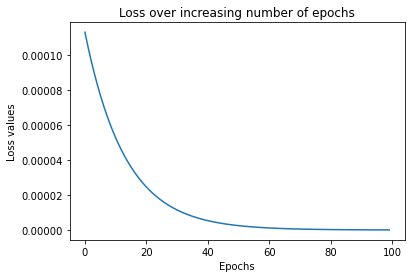

In [62]:
plt.plot(losses)
plt.title('Loss over increasing number of epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss values')

Text(0, 0.5, 'weight values')

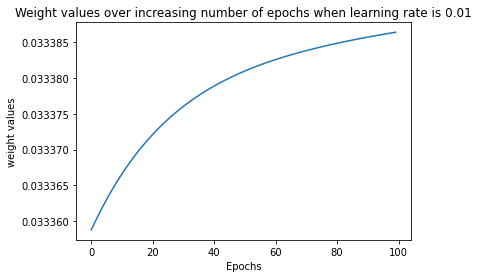

In [65]:
plt.plot(weight_value)
plt.title('Weight values over increasing number of epochs when learning rate is 0.01')
plt.xlabel('Epochs')
plt.ylabel('weight values')